## Importing the Dependencies

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
import numpy as np
from helper_functions.helper_functions import show_img, RGB_image, gray_image, degradation_operator, convergence, generate_gaussian_kernel
from helper_functions.helper_functions import safe_psnr as psnr


## Importing the Image

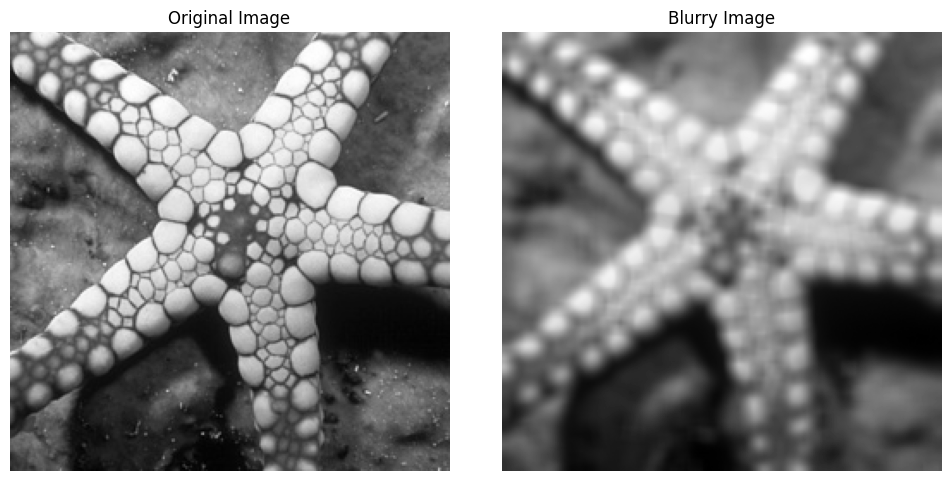

In [3]:
img_path = '../test_images/starfish.tif'
original_img = gray_image(img_path)
kernel = generate_gaussian_kernel(kernel_size = 9, sigma_blur = 10)
degraded_img = degradation_operator(original_img, kernel)
noise_std = 0.001
noisy_img = degraded_img + noise_std * np.random.randn(*degraded_img.shape)
show_img(original_img, noisy_img,  titles= ['Original Image', 'Blurry Image'])

## Running the Algorithms

### Steepest Descent

100%|██████████| 1000/1000 [01:03<00:00, 15.82it/s]


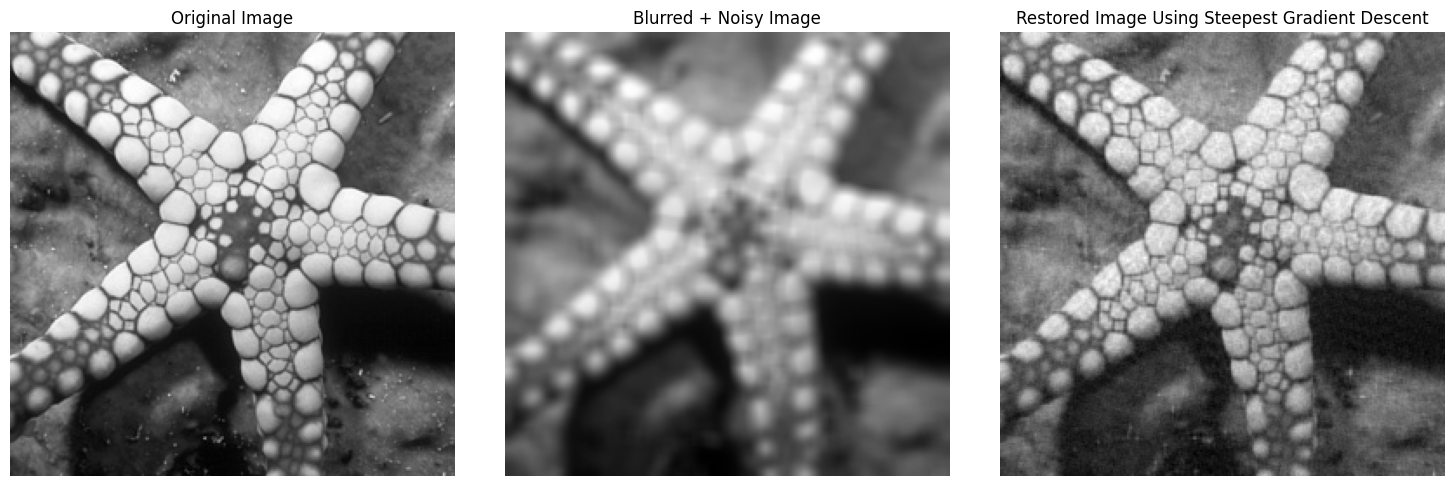

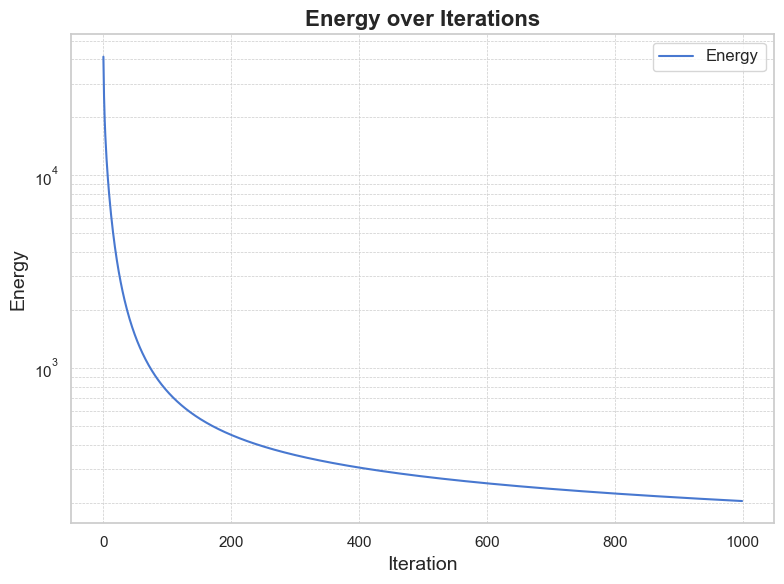

The original image psnr is :  inf dB
The noisy image psnr is :  21.661869259289745 dB
The reconstructed image psnr is :  28.664108542885344 dB


c:\Users\lenonvo\Desktop\UniV COURS\Project Image\helper_functions\helper_functions.py:114: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  return psnr(image_true, image_test, data_range=data_range)


In [4]:
sigma = 0.01  
lambda_ = 0.01 
num_iterations = 1000  
sigma_denoise = 0.001  

from Steepest_Descent_RGB import steepest_descent_red_all

restored_img_sg, energy_values = steepest_descent_red_all(
        y=noisy_img,
        kernel= kernel,
        sigma=sigma,
        sigma_f = sigma_denoise,
        lambda_= lambda_,
        num_iterations=num_iterations,
        tol= 1e-6
    )

show_img(original_img, noisy_img ,restored_img_sg, titles= ['Original Image', 'Blurred + Noisy Image','Restored Image Using Steepest Gradient Descent'])
convergence(energy_values)

print("The original image psnr is : ", psnr(original_img, original_img), "dB")
print("The noisy image psnr is : ",psnr(original_img, noisy_img), "dB")
print("The reconstructed image psnr is : ",psnr(original_img, restored_img_sg), "dB")

### Steepest Descent Accelerated

100%|██████████| 150/150 [00:33<00:00,  4.53it/s]


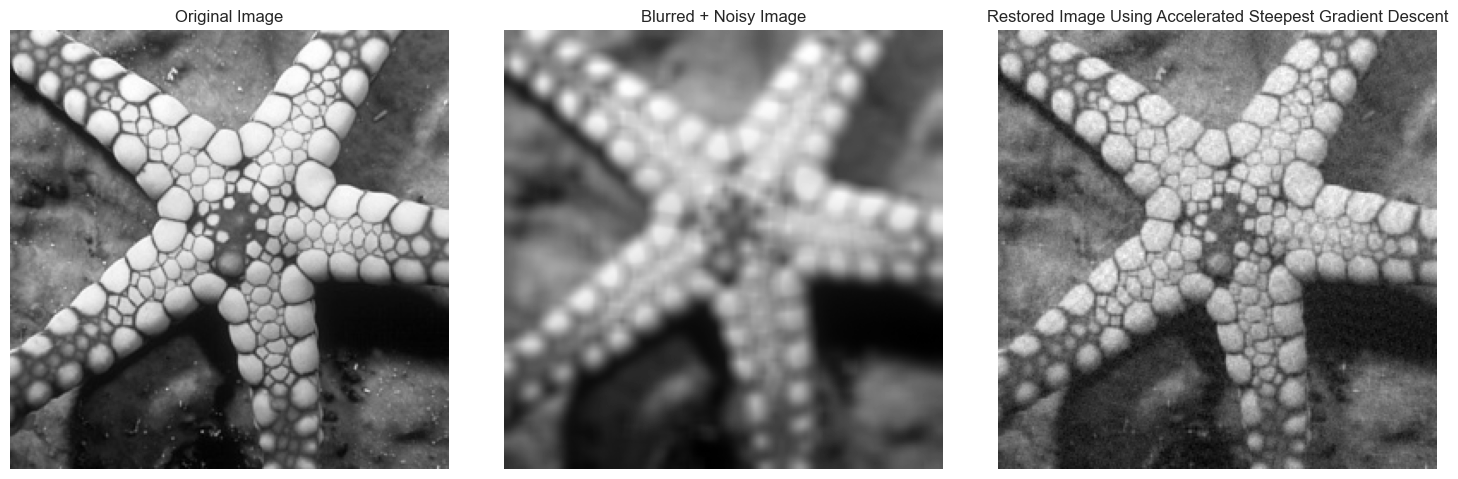

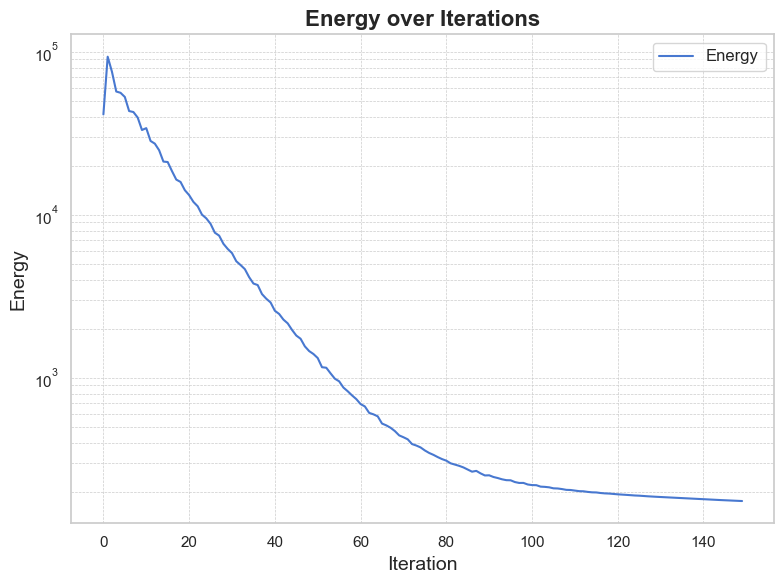

The original image psnr is :  inf dB
The noisy image psnr is :  21.661869259289745 dB
The reconstructed image psnr is :  28.593123788417053 dB


In [5]:
sigma = 0.01  
lambda_ = 0.01 
num_iterations = 150  
sigma_denoise = 0.001  

from AGD import accelerated_steepest_descent_red_all

restored_img_sg, energy_values = accelerated_steepest_descent_red_all(
        y=noisy_img,
        kernel= kernel,
        sigma=sigma,
        sigma_f = sigma_denoise,
        lambda_= lambda_,
        num_iterations=num_iterations,
        tol= 1e-6
    )

show_img(original_img, noisy_img ,restored_img_sg, titles= ['Original Image', 'Blurred + Noisy Image','Restored Image Using Accelerated Steepest Gradient Descent'])
convergence(energy_values)

print("The original image psnr is : ", psnr(original_img, original_img), "dB")
print("The noisy image psnr is : ",psnr(original_img, noisy_img), "dB")
print("The reconstructed image psnr is : ",psnr(original_img, restored_img_sg), "dB")

### Fixed Point 

  1%|          | 1/100 [00:00<01:38,  1.00it/s]

100%|██████████| 100/100 [00:54<00:00,  1.85it/s]


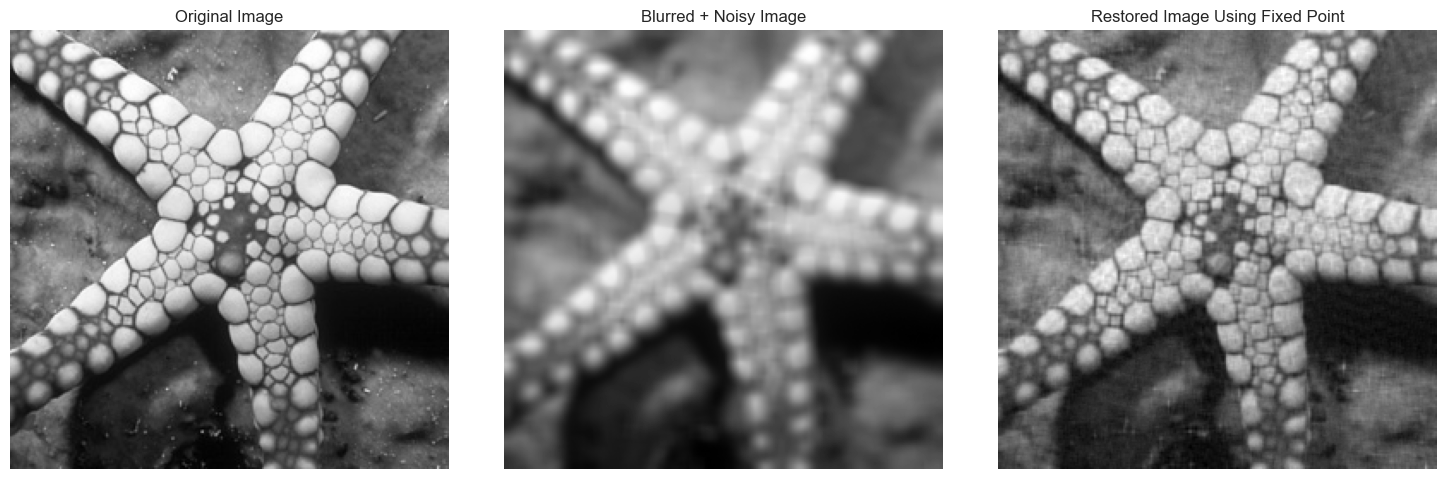

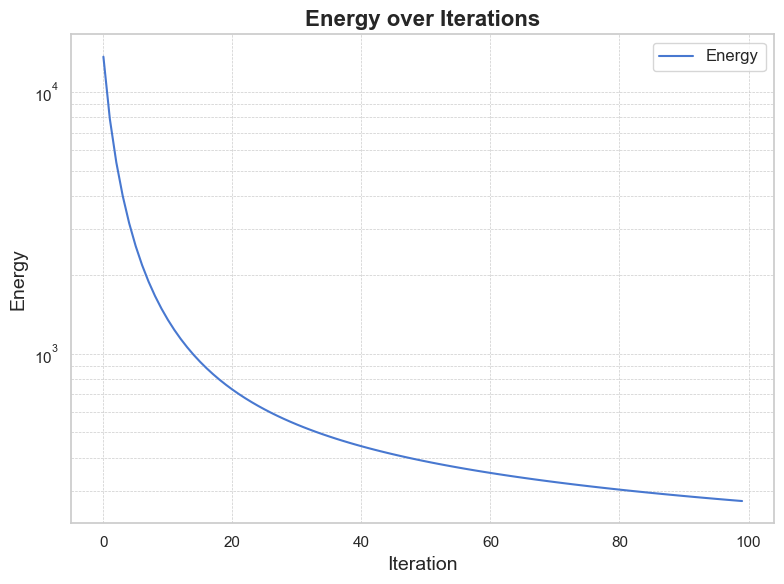

The original image psnr is :  inf dB
The noisy image psnr is :  21.661869259289745 dB
The reconstructed image psnr is :  28.265257124413626 dB


In [6]:
sigma = 0.01  
lambda_ = 0.01  
N = 100  
m = 5
sigma_denoise = 0.001

from Fixed_Point_RGB import fixed_point_red_all

restored_img_fixed, energy_values = fixed_point_red_all(
    y = noisy_img,
    kernel= kernel,
    sigma = sigma,
    sigma_f= sigma_denoise,
    lambda_= lambda_,
    N = N,
    m = m

)


show_img(original_img, noisy_img ,restored_img_fixed, titles= ['Original Image', 'Blurred + Noisy Image','Restored Image Using Fixed Point'])
convergence(energy_values)

print("The original image psnr is : ", psnr(original_img, original_img), "dB")
print("The noisy image psnr is : ",psnr(original_img, noisy_img), "dB")
print("The reconstructed image psnr is : ",psnr(original_img, restored_img_fixed), "dB")

### ADMM

  0%|          | 0/70 [00:00<?, ?it/s]

100%|██████████| 70/70 [01:09<00:00,  1.01it/s]


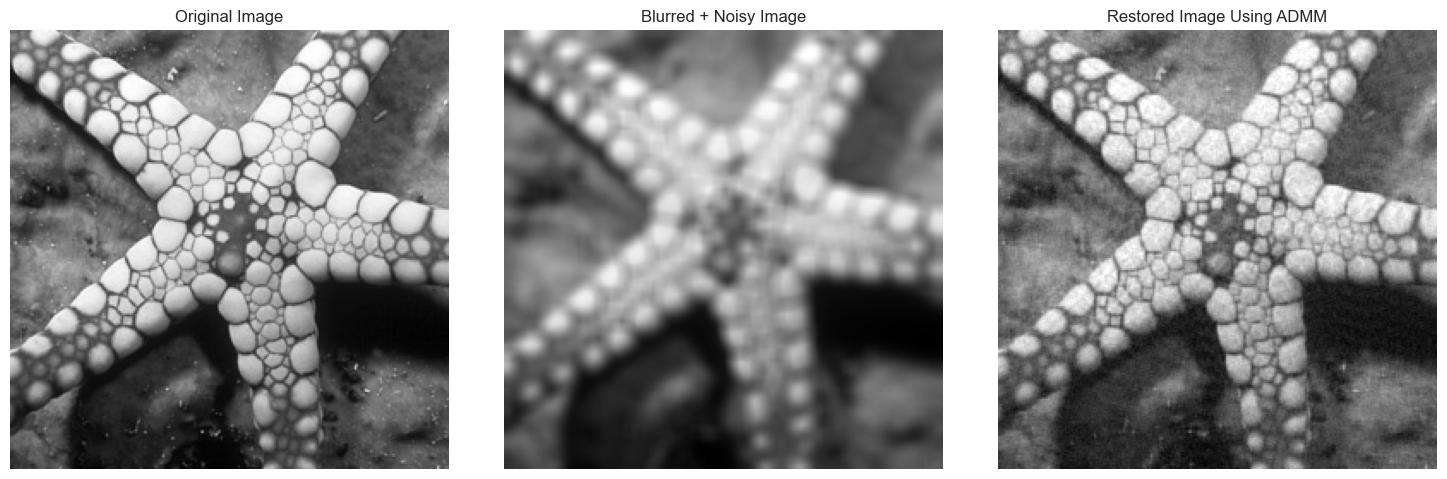

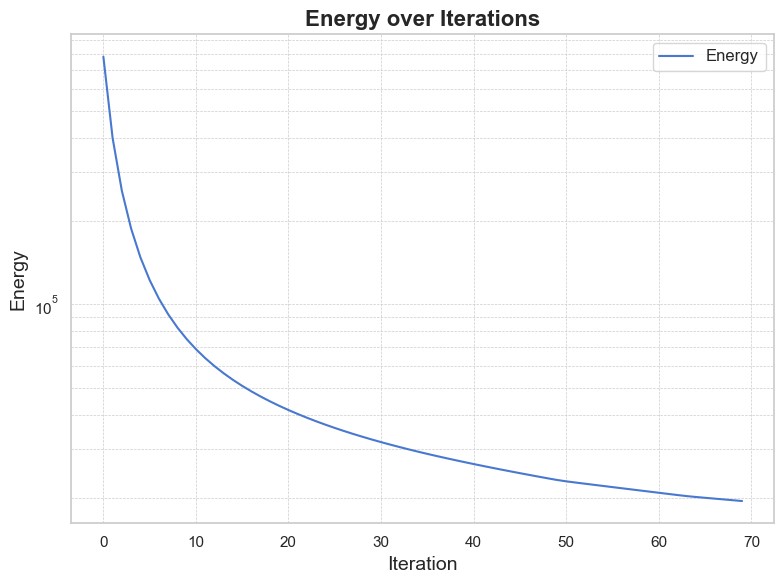

The original image psnr is :  inf dB
The noisy image psnr is :  21.661869259289745 dB
The reconstructed image psnr is :  28.714644355184014 dB


In [7]:
N = 70        
m1 = 10       
m2 = 1          
lambd = 0.01    
beta = 0.05    
sigma = 0.001  
denoising_sigma = 0.001 
tol=1e-2

from ADMM_RGB import RED_ADMM_Solver_all

noisy_img = np.asarray(noisy_img)
red = RED_ADMM_Solver_all(noisy_img, kernel, denoising_sigma, lambd, beta, sigma, N, m1, m2, tol)
restored_img_admm, energy_values = red.run()
show_img(original_img, noisy_img ,restored_img_admm, titles= ['Original Image', 'Blurred + Noisy Image','Restored Image Using ADMM'])
convergence(energy_values)


print("The original image psnr is : ", psnr(original_img, original_img), "dB")
print("The noisy image psnr is : ",psnr(original_img, noisy_img), "dB")
print("The reconstructed image psnr is : ",psnr(original_img, restored_img_admm), "dB")